In [38]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
from matplotlib import style
import numpy as np
import random

In [39]:
data = pd.read_csv('c:/chewy1.csv', encoding='CP949')

In [40]:
#제품과 영양성분만 추출
data.head()
df1 = data[['product','protein','fat','fiber','moisture']]
print(df1.head())

                                             product  protein   fat  fiber  \
0              Meow Mix Original Choice Dry Cat Food     0.31  0.11   0.04   
1                       Cat Chow Indoor Dry Cat Food     0.30  0.10   0.06   
2                     Cat Chow Complete Dry Cat Food     0.32  0.12   0.03   
3                        Kit & Kaboodle Dry Cat Food     0.28  0.10   0.03   
4  Royal Canin Veterinary Diet Urinary SO Dry Cat...     0.33  0.13   0.04   

   moisture  
0      0.12  
1      0.12  
2      0.12  
3      0.12  
4      0.08  


In [42]:
def kmean(n,k):
    d = n.shape[1]
    c = np.random.choice(range(len(n)),k)
    print('n:',len(n))
    c = n[c].astype('float64')
    print(c)
    init = True
    while init == True:
        cluster = np.zeros((len(n),k))
        
        for i in range(len(n)):
            temp = np.zeros((k))
            
        
            for j in range(k):
                g_temp = 0
                for g in range(d):
                    g_temp += (c[j][g] - n[i][g])**2
            
                temp[j] = g_temp**0.5
        
            cluster[i][np.argmin(temp)] = 1
        
        
        cnt = 0
        for p in range(k):

            clu_index = np.where(cluster[:,p]==1)
            clu_vec = n[clu_index]
            print("np.sum",np.sum(clu_vec, axis=0))
            print(len(clu_vec))
            k_to_c = np.sum(clu_vec, axis=0)/len(clu_vec)
            point_c = 0
            for g in range(d):
                point_c += (c[p][g] - k_to_c[g])**2
                
            
            if point_c**0.5 < 3:
                cnt += 1
                if cnt == k:
                    init = False
                    break
            
            c[p] = k_to_c
        
    print(c)
    return cluster, c
        

In [43]:
#sample data 생성
x = df1['protein']
y = df1['fat']
z = df1['fiber']

data2 = np.column_stack((x,y,z)) #3차원 배열 만들기
print(data2)

[[0.31 0.11 0.04]
 [0.3  0.1  0.06]
 [0.32 0.12 0.03]
 ...
 [0.31 0.1  0.09]
 [0.35 0.19 0.04]
 [0.36 0.22 0.04]]


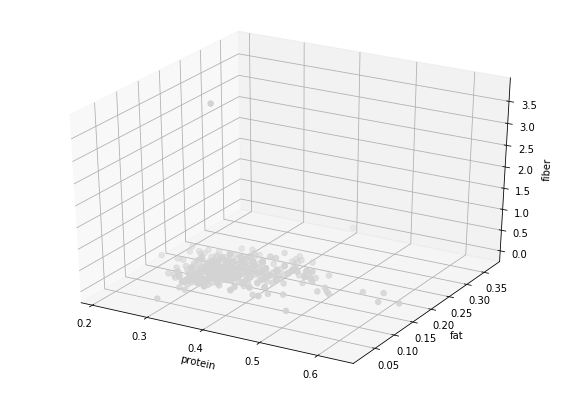

In [44]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')

if data2.shape[1] == 3:
    ax.scatter(data2[:,0],data2[:,1],data2[:,2],c='lightgray', marker='o', s=30)

else:
    ax.scatter(data2[:,0],data2[:,1], c='lightgray', marker='o', s=30)

ax.set_xlabel("protein")
ax.set_ylabel("fat")
ax.set_zlabel("fiber")

plt.grid(True)
plt.show()


In [7]:
#아웃라이어 제거하고 k-means 돌리기

In [8]:
from sklearn.ensemble import IsolationForest
df2 = data[['protein','fat','fiber']]

In [45]:
#Isolation Forest 활용한 Outlier detection
#참고 https://tariat.tistory.com/29 
#https://partrita.github.io/posts/isolation-forest/

clf=IsolationForest(n_estimators=50, max_samples=50, contamination=float(0.01), 
                    max_features=1.0, bootstrap=False, n_jobs=-1, 
                    random_state=None, verbose=0,behaviour="new")

clf.fit(df2)
pred = clf.predict(df2)
df2['anomaly']=pred
outliers=df2.loc[df2['anomaly']==-1]
outlier_index=list(outliers.index)
print(outlier_index)
print(df2['anomaly'].value_counts()) #outlier 6개 

out = pd.DataFrame(outliers)
out

df3 = pd.concat([df2, out])
df3

C:\anaconda\lib\site-packages\sklearn\ensemble\_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


[21, 107, 170, 238, 249, 495]
 1    572
-1      6
Name: anomaly, dtype: int64


,protein,fat,fiber,anomaly
0,0.31,0.11,0.04,1
1,0.30,0.10,0.06,1
2,0.32,0.12,0.03,1
3,0.28,0.10,0.03,1
4,0.33,0.13,0.04,1
...,...,...,...,...
107,0.32,0.09,0.16,-1
170,0.50,0.06,0.08,-1
238,0.31,0.07,0.16,-1
249,0.38,0.11,0.13,-1


In [46]:
# 아웃라이어 삭제
df3.drop(df3.index[[21, 107, 170, 238, 249, 495]],inplace=True)

In [47]:
df3

,protein,fat,fiber,anomaly
0,0.31,0.11,0.04,1
1,0.30,0.10,0.06,1
2,0.32,0.12,0.03,1
3,0.28,0.10,0.03,1
4,0.33,0.13,0.04,1
...,...,...,...,...
573,0.33,0.16,0.04,1
574,0.52,0.14,0.06,1
575,0.31,0.10,0.09,1
576,0.35,0.19,0.04,1


In [48]:
#k를 결정하기 위한 elbow method algorithm

from sklearn.cluster import KMeans
from sklearn import datasets

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df3)
    distortions.append(kmeanModel.inertia_)

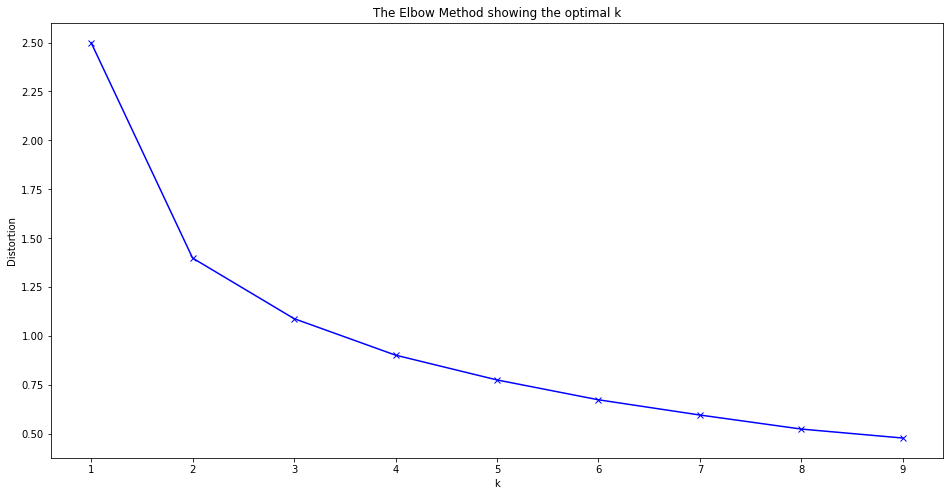

In [49]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#elbow point = 3 => k = 3
#참고: https://predictivehacks.com/k-means-elbow-method-code-for-python/

In [50]:
x = df3['protein']
y = df3['fat']
z = df3['fiber']

data3 = np.column_stack((x,y,z)) #3차원 배열 만들기
print(data3)

[[0.31 0.11 0.04]
 [0.3  0.1  0.06]
 [0.32 0.12 0.03]
 ...
 [0.31 0.1  0.09]
 [0.35 0.19 0.04]
 [0.36 0.22 0.04]]


In [51]:
#군집분석
clu,c = kmean(data3,3) #clu(데이터그룹), c(클러스터 위치) 받음

n: 572
[[0.35 0.19 0.05]
 [0.32 0.16 0.07]
 [0.45 0.18 0.03]]
np.sum [52.11 26.01  5.82]
146
np.sum [102.4   43.02  17.12]
325
np.sum [43.57 17.13  3.82]
101
[[0.35691781 0.17815068 0.03986301]
 [0.31507692 0.13236923 0.05267692]
 [0.45       0.18       0.03      ]]


['#AFEEEE', '#FFA500', '#FA8072']


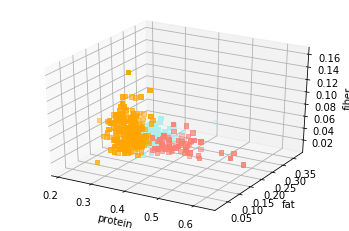

In [71]:
fig = plt.figure()
ax = fig.gca(projection='3d')
color = random.sample(list(mcolors.CSS4_COLORS.values()),len(c))
print(color)
for i in range(len(c)):
    if data3.shape[1]==3:
        ax.scatter(data3[np.where(clu[:,i]==1)][:,0],data3[np.where(clu[:,i]==1)][:,1],data3[np.where(clu[:,i]==1)][:,2], c = color[i], marker='s')
    else:
        ax.scatter(data3[np.where(clu[:,i]==1)][:,0],data3[np.where(clu[:,i]==1)][:,1],c = color[i], marker='s')
    
if data3.shape[1] == 3:
    ax.scatter(c[:,0],c[:,1],c[:,2], c='red', marker='*')
else:
    ax.scatter(c[:,0],c[:,1], c='red', marker='*')
    
ax.set_xlabel("protein")
ax.set_ylabel("fat")
ax.set_zlabel("fiber")
plt.show()
    

In [72]:
print(data3[np.where(clu[:,0])][:,0],data3[np.where(clu[:,0])][:,1],data3[np.where(clu[:,0])][:,2])
#첫번째 클러스터의 protein / fat / fiber

print('--------------------------------------------------------------------------------------------')
print(data3[np.where(clu[:,1])][:,0],data3[np.where(clu[:,1])][:,1],data3[np.where(clu[:,1])][:,2])

print('--------------------------------------------------------------------------------------------')
print(data3[np.where(clu[:,2])][:,0],data3[np.where(clu[:,2])][:,1],data3[np.where(clu[:,2])][:,2])

[0.35 0.34 0.33 0.38 0.34 0.34 0.36 0.36 0.36 0.34 0.33 0.34 0.35 0.34
 0.32 0.38 0.4  0.36 0.3  0.33 0.38 0.36 0.34 0.36 0.36 0.3  0.35 0.36
 0.38 0.4  0.36 0.4  0.38 0.34 0.35 0.36 0.36 0.38 0.38 0.34 0.34 0.36
 0.36 0.38 0.36 0.39 0.4  0.34 0.36 0.38 0.34 0.35 0.38 0.39 0.38 0.36
 0.4  0.36 0.36 0.32 0.36 0.36 0.34 0.36 0.34 0.37 0.36 0.36 0.37 0.4
 0.38 0.36 0.36 0.36 0.31 0.4  0.36 0.33 0.33 0.34 0.4  0.31 0.32 0.38
 0.36 0.37 0.32 0.36 0.32 0.36 0.37 0.4  0.36 0.36 0.37 0.36 0.34 0.34
 0.33 0.36 0.38 0.36 0.35 0.38 0.36 0.3  0.32 0.32 0.36 0.36 0.38 0.32
 0.38 0.38 0.33 0.38 0.38 0.38 0.31 0.36 0.34 0.38 0.37 0.36 0.4  0.34
 0.34 0.38 0.36 0.35 0.34 0.38 0.33 0.32 0.35 0.3  0.37 0.35 0.34 0.32
 0.41 0.4  0.38 0.36 0.35 0.36] [0.17 0.17 0.21 0.16 0.17 0.17 0.16 0.2  0.15 0.17 0.19 0.17 0.14 0.16
 0.23 0.14 0.16 0.19 0.2  0.2  0.18 0.17 0.18 0.16 0.16 0.23 0.19 0.16
 0.17 0.2  0.16 0.16 0.17 0.17 0.14 0.18 0.16 0.16 0.17 0.21 0.22 0.16
 0.17 0.13 0.16 0.15 0.17 0.18 0.16 0.2  0.2  